# Check Col de Porte soil properties

- Update: Lejeune et al. ([2019](https://essd.copernicus.org/articles/11/71/2019/))  
- Data: https://doi.osug.fr/public/CRYOBSCLIM_CDP/CRYOBSCLIM.CDP.2018.Soil.html (downloaded 23/11/2023)

In [1]:
# Env: phd_v3
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import calendar
import os

In [203]:
path = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/CRYOBSCLIM.CDP.2018.Soil/Soil'

df_2008 = pd.read_csv(path+'/soil_properties_2008.csv', sep=';')
df_2008.index = (df_2008.iloc[:, 0] + df_2008.iloc[:, 1])/2*1e-2 # add index: average level of each measurements (m)
ds_2008 = df_2008.to_xarray()
df_2008

,top_depth (cm),bottom_depth (cm),Dry density (kg/m³),Carbon (g/kg),Total Nitrogen (g/kg),Organic Matter (g/kg),Stones (>0.5 cm) g/kg,Gravel (0.2 to 0.5 cm) (g/kg),Fine soil (< 0.2 cm) (g/kg),Coarse sand.200 to 2000 microns (g/kg),Fine sand. 50 to 200 microns (g/kg),Coarse silt. 20 to 50 microns (g/kg),Fine silt. 2 to 20 microns (g/kg),Clay <2 microns. (g/kg)
0.035,0.5,6.5,NaN,46.40,4.02,80.30,50.3,5.7,944.0,54.0,266.0,137.0,251.0,292.0
0.140,11.0,17.0,NaN,29.40,2.72,50.90,61.2,19.0,920.0,55.0,271.0,133.0,239.0,302.0
0.300,27.0,33.0,NaN,6.73,0.81,11.60,25.3,9.1,966.0,74.0,225.0,105.0,225.0,371.0
0.400,37.0,43.0,NaN,3.91,0.54,6.76,27.6,13.2,959.0,67.0,262.0,122.0,220.0,329.0
0.500,47.0,53.0,NaN,2.51,0.41,4.34,38.0,37.7,924.0,98.0,189.0,128.0,235.0,350.0
0.600,57.0,63.0,NaN,2.40,0.39,4.14,6.0,22.6,971.0,85.0,177.0,142.0,253.0,343.0
0.700,67.0,73.0,NaN,1.74,0.30,3.00,44.6,2.8,953.0,120.0,215.0,150.0,211.0,304.0
0.850,82.0,88.0,NaN,2.88,0.40,4.99,62.7,51.3,886.0,73.0,201.0,143.0,234.0,349.0


In [204]:
df_2012 = pd.read_csv(path+'/soil_properties_2012.csv', sep=';')
df_2012.index = (df_2012.iloc[:, 0] + df_2012.iloc[:, 1])/2*1e-2 # add index: average level of each measurements (m)
ds_2012 = df_2012.to_xarray()
df_2012

,top_depth (cm),bottom_depth (cm),Dry density (kg/m3),Carbon (g/kg),Total Nitrogen (g/kg),Organic Matter (g/kg),Stones (>0.5 cm) g/kg,Gravel (0.2 to 0.5 cm) (g/kg),Fine soil (< 0.2 cm) (g/kg),Coarse sand.200 to 2000 microns (g/kg),Fine sand. 50 to 200 microns (g/kg),Coarse silt. 20 to 50 microns (g/kg),Fine silt. 2 to 20 microns (g/kg),Clay <2 microns. (g/kg)
0.025,0,5,0.95,41.50,16.89,71.8,14.90,0.58,985.0,51.0,243.0,146.0,259.0,301.0
0.100,5,15,1.13,23.00,1.86,39.7,48.00,5.55,946.0,92.0,248.0,114.0,267.0,279.0
0.200,15,25,1.18,13.80,1.23,23.9,8.41,1.53,990.0,77.0,242.0,138.0,267.0,276.0
0.300,25,35,1.26,8.18,0.78,14.2,60.10,0.23,940.0,81.0,249.0,132.0,264.0,274.0


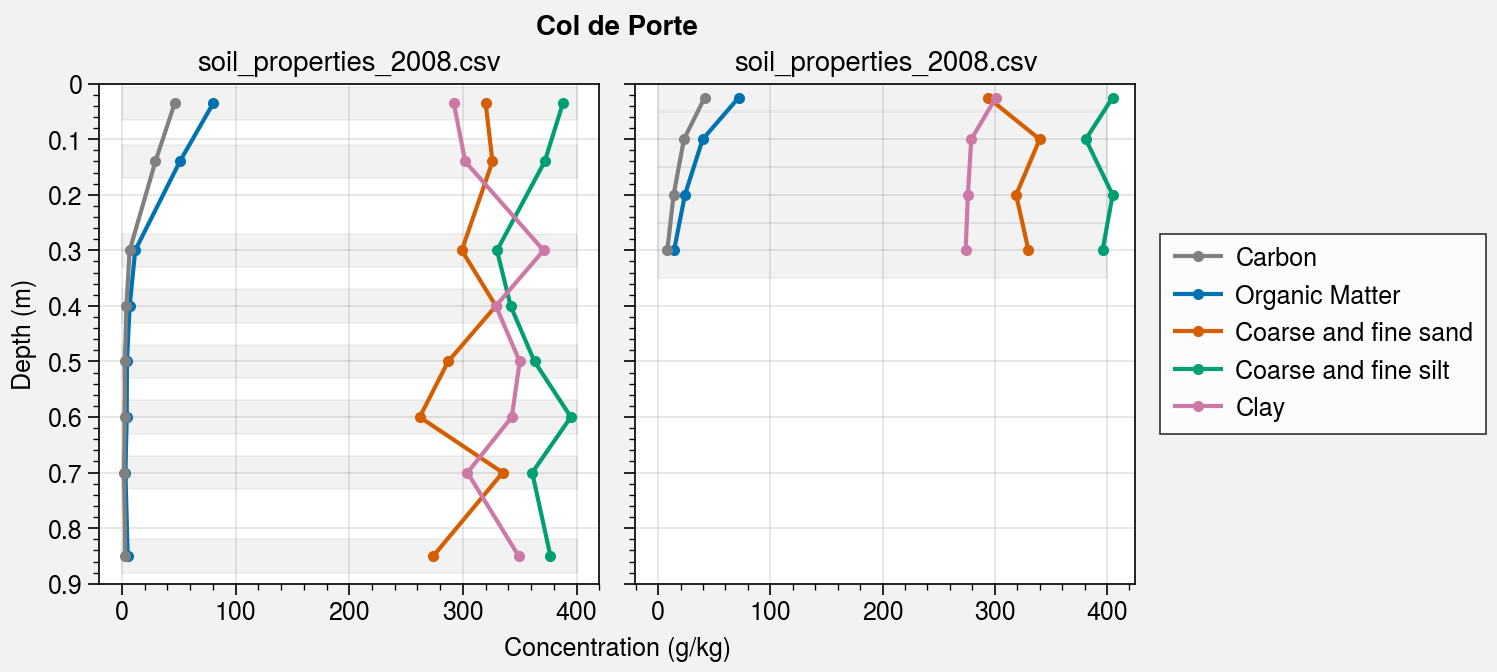

In [252]:
from matplotlib.patches import Rectangle

fig, axs = plot.subplots(nrows=1, ncols=2)
marker = '.'

############
### 2008 ###
############

h1 = axs[0].plot(ds_2008['Organic Matter (g/kg)'], ds_2008.index, label='Organic Matter', marker=marker)
h2 = axs[0].plot(ds_2008['Coarse sand.200 to 2000 microns (g/kg)'] + ds_2008['Fine sand. 50 to 200 microns (g/kg)'], 
                 ds_2008.index, label='Coarse and fine sand', marker=marker)
h3 = axs[0].plot(ds_2008['Coarse silt. 20 to 50 microns (g/kg)'] + ds_2008['Fine silt. 2 to 20 microns (g/kg)'], 
                 ds_2008.index, label='Coarse and fine silt', marker=marker)
h4 = axs[0].plot(ds_2008['Clay <2 microns. (g/kg)'], ds_2008.index, label='Clay', marker=marker)
h0 = axs[0].plot(ds_2008['Carbon (g/kg)'], ds_2008.index, label='Carbon', marker=marker, color='grey')

# # Add the layer measurements
for i in range(ds_2008.index.size):
    axs[0].add_patch(Rectangle((0, ds_2008['top_depth (cm)'][i]*1e-2), 400, (ds_2008['bottom_depth (cm)'][i]-ds_2008['top_depth (cm)'][i])*1e-2, alpha=0.1, color='grey'))

axs[0].format(title='soil_properties_2008.csv', xlabel='Concentration (g/kg)', ylabel='Depth (m)', 
              xreverse=False, yreverse=True, ylim=(90*1e-2, 0))


# ############
# ### 2012 ###
# ############

h1 = axs[1].plot(ds_2012['Organic Matter (g/kg)'], ds_2012.index, label='Organic Matter', marker=marker)
h2 = axs[1].plot(ds_2012['Coarse sand.200 to 2000 microns (g/kg)'] + ds_2012['Fine sand. 50 to 200 microns (g/kg)'], 
                 ds_2012.index, label='Coarse and fine sand', marker=marker)
h3 = axs[1].plot(ds_2012['Coarse silt. 20 to 50 microns (g/kg)'] + ds_2012['Fine silt. 2 to 20 microns (g/kg)'], 
                 ds_2012.index, label='Coarse and fine silt', marker=marker)
h4 = axs[1].plot(ds_2012['Clay <2 microns. (g/kg)'], ds_2012.index, label='Clay', marker=marker)
h0 = axs[1].plot(ds_2012['Carbon (g/kg)'], ds_2012.index, label='Carbon', marker=marker, color='grey')

# # Add the layer measurements
for i in range(ds_2012.index.size):
    axs[1].add_patch(Rectangle((0, ds_2012['top_depth (cm)'][i]*1e-2), 400, (ds_2012['bottom_depth (cm)'][i]-ds_2012['top_depth (cm)'][i])*1e-2, alpha=0.1, color='grey'))

axs[1].format(title='soil_properties_2008.csv', xlabel='Concentration (g/kg)', ylabel='Depth (m)', 
              xreverse=False, yreverse=True, ylim=(90*1e-2, 0))


fig.suptitle('Col de Porte')
fig.legend([h0, h1, h2, h3, h4], loc='r', ncols=1)



## Convert to CLASSIC soil proporties: ORGM, SAND, and CLAY (+interp)

In [237]:
path = '/home/lalandmi/eccc/classic-develop/inputFiles/SnowMIP/FR-Cdp_test'

ds = xr.open_dataset(path+'/FR-Cdp_init.nc')
ds

<xarray.Dataset>
Dimensions:            (ic: 5, icc: 12, iccp1: 13, iccp2: 14, icp1: 6, lat: 1, layer: 20, lon: 1, slope: 8, tile: 1)
Coordinates:
  * lat                (lat) float64 45.3
  * lon                (lon) float64 5.77
  * tile               (tile) int32 1
  * icp1               (icp1) int32 1 2 3 4 5 6
  * layer              (layer) int32 1 2 3 4 5 6 7 8 ... 13 14 15 16 17 18 19 20
  * ic                 (ic) int32 1 2 3 4 5
  * icc                (icc) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * iccp1              (iccp1) int32 1 2 3 4 5 6 7 8 9 10 11 12 13
  * iccp2              (iccp2) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * slope              (slope) int32 1 2 3 4 5 6 7 8
Data variables:
    ALBS               (tile, lat, lon) float64 ...
    ALIC               (tile, icp1, lat, lon) float64 ...
    ALVC               (tile, icp1, lat, lon) float64 ...
    CLAY               (tile, layer, lat, lon) float64 ...
    CMAS               (tile, ic, lat, lon) float64 ...
    Cmossmas           (tile, lat, lon) float64 ...
    DELZ               (layer) float64 ...
    DRN                (tile, lat, lon) float64 ...
    FARE               (tile, lat, lon) float64 ...
    FCAN               (tile, icp1, lat, lon) float64 ...
    GRO                (tile, lat, lon) float64 ...
    LNZ0               (tile, icp1, lat, lon) float64 ...
    ORGM               (tile, layer, lat, lon) float64 ...
    PAMN               (tile, ic, lat, lon) float64 ...
    PAMX               (tile, ic, lat, lon) float64 ...
    RCAN               (tile, lat, lon) float64 ...
    RHOS               (tile, lat, lon) float64 ...
    ROOT               (tile, ic, lat, lon) float64 ...
    SAND               (tile, layer, lat, lon) float64 ...
    SCAN               (tile, lat, lon) float64 ...
    SDEP               (tile, lat, lon) float64 ...
    SNO                (tile, lat, lon) float64 ...
    SOCI               (tile, lat, lon) float64 ...
    TBAR               (tile, layer, lat, lon) float64 ...
    TCAN               (tile, lat, lon) float64 ...
    THIC               (tile, layer, lat, lon) float64 ...
    THLQ               (tile, layer, lat, lon) float64 ...
    TPND               (tile, lat, lon) float64 ...
    TSNO               (tile, lat, lon) float64 ...
    ZPND               (tile, lat, lon) float64 ...
    bleafmas           (tile, icc, lat, lon) float64 ...
    dmoss              (tile, lat, lon) float64 ...
    fcancmx            (tile, icc, lat, lon) float64 ...
    grclarea           (lat, lon) float64 ...
    ipeatland          (tile, lat, lon) float64 ...
    lfstatus           (tile, icc, lat, lon) float64 ...
    litrmass           (tile, layer, iccp2, lat, lon) float64 ...
    litrmsmoss         (tile, lat, lon) float64 ...
    nbleafmas          (tile, icc, lat, lon) float64 ...
    ngleafmas_ns       (tile, icc, lat, lon) float64 ...
    ngleafmas_s        (tile, icc, lat, lon) float64 ...
    nh4_mass           (tile, iccp1, lat, lon) float32 ...
    nlitrmass          (tile, iccp1, lat, lon) float64 ...
    soilnmas           (tile, iccp1, lat, lon) float64 ...
    nmtest             (lat, lon) float64 ...
    no3_mass           (tile, iccp1, lat, lon) float32 ...
    soilpH             (tile, lat, lon) float32 ...
    nrootmass_ns       (tile, icc, lat, lon) float64 ...
    nrootmass_s        (tile, icc, lat, lon) float64 ...
    nstemmass_ns       (tile, icc, lat, lon) float64 ...
    nstemmass_s        (tile, icc, lat, lon) float64 ...
    pandays            (tile, icc, lat, lon) float64 ...
    slopefrac          (tile, slope, lat, lon) float64 ...
    soilcmas           (tile, layer, iccp2, lat, lon) float64 ...
    maxAnnualActLyr    (tile, lat, lon) float64 ...
    grwtheff           (tile, icc, lat, lon) float64 ...
    gleafmas_ns        (tile, icc, lat, lon) float64 ...
    gleafmas_s         (tile, icc, lat, lon) float64 ...
    stemmass_ns        (tile, icc, lat, lon) float64 ...
    stemmass_s         

In [238]:
center_model_depth = [ds.DELZ.cumsum()[0].values.item(0)/2]
for i in range(ds.DELZ.size-1):
    center_model_depth.append( (ds.DELZ.cumsum()[i].values.item(0) + ds.DELZ.cumsum()[i+1].values.item(0)) / 2 )
center_model_depth

[0.05,
 0.15000000000000002,
 0.25,
 0.35000000000000003,
 0.45,
 0.55,
 0.6499999999999999,
 0.75,
 0.8499999999999999,
 0.95,
 1.0999999999999999,
 1.35,
 1.7,
 2.15,
 2.9,
 4.9,
 8.9,
 18.9,
 41.4,
 58.9]

In [250]:
ds_2008_interp = ds_2008.interp(index=center_model_depth)
ds_2012_interp = ds_2012.interp(index=center_model_depth)

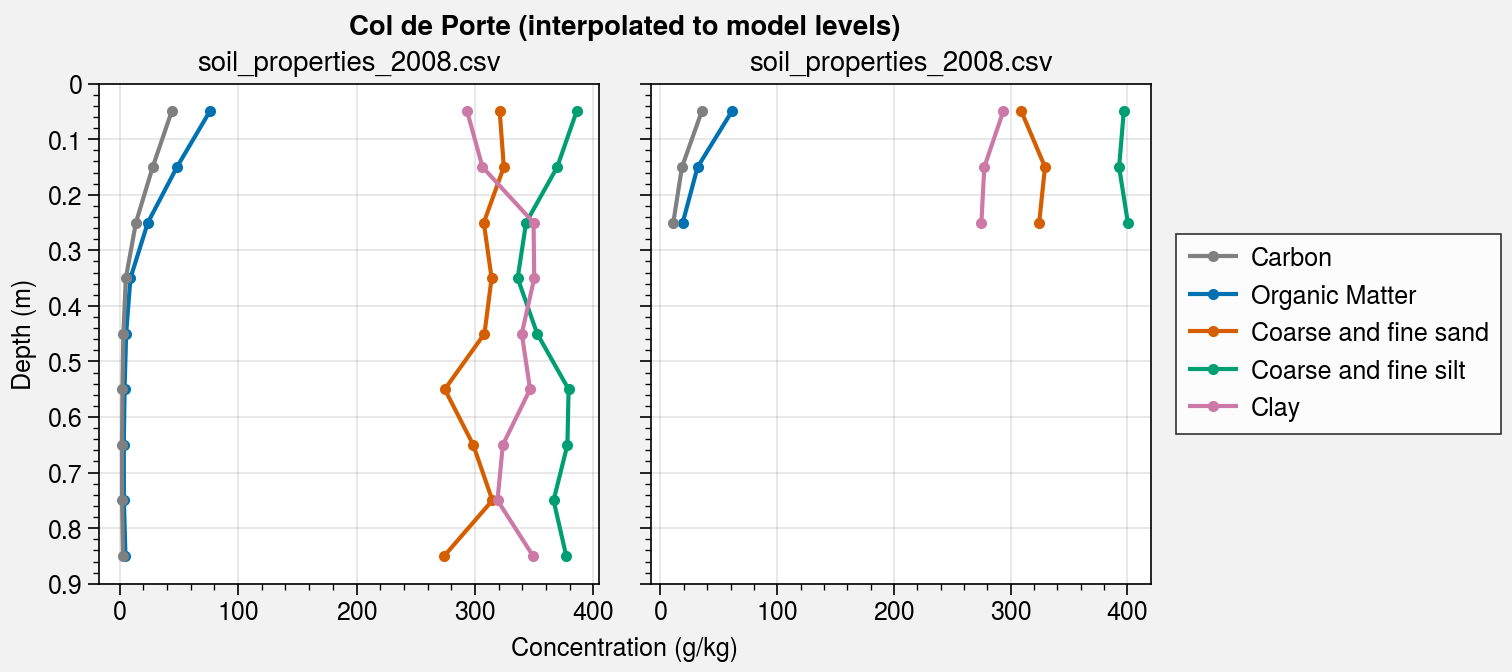

In [253]:
from matplotlib.patches import Rectangle

fig, axs = plot.subplots(nrows=1, ncols=2)
marker = '.'

############
### 2008 ###
############

h1 = axs[0].plot(ds_2008_interp['Organic Matter (g/kg)'], ds_2008_interp.index, label='Organic Matter', marker=marker)
h2 = axs[0].plot(ds_2008_interp['Coarse sand.200 to 2000 microns (g/kg)'] + ds_2008_interp['Fine sand. 50 to 200 microns (g/kg)'], 
                 ds_2008_interp.index, label='Coarse and fine sand', marker=marker)
h3 = axs[0].plot(ds_2008_interp['Coarse silt. 20 to 50 microns (g/kg)'] + ds_2008_interp['Fine silt. 2 to 20 microns (g/kg)'], 
                 ds_2008_interp.index, label='Coarse and fine silt', marker=marker)
h4 = axs[0].plot(ds_2008_interp['Clay <2 microns. (g/kg)'], ds_2008_interp.index, label='Clay', marker=marker)
h0 = axs[0].plot(ds_2008_interp['Carbon (g/kg)'], ds_2008_interp.index, label='Carbon', marker=marker, color='grey')

# # Add the layer measurements
# for i in range(ds_2008.index.size):
#     axs[0].add_patch(Rectangle((0, ds_2008['top_depth (cm)'][i]*1e-2), 400, (ds_2008['bottom_depth (cm)'][i]-ds_2008['top_depth (cm)'][i])*1e-2, alpha=0.1, color='grey'))

axs[0].format(title='soil_properties_2008.csv', xlabel='Concentration (g/kg)', ylabel='Depth (m)', 
              xreverse=False, yreverse=True, ylim=(90*1e-2, 0))


# ############
# ### 2012 ###
# ############

h1 = axs[1].plot(ds_2012_interp['Organic Matter (g/kg)'], ds_2012_interp.index, label='Organic Matter', marker=marker)
h2 = axs[1].plot(ds_2012_interp['Coarse sand.200 to 2000 microns (g/kg)'] + ds_2012_interp['Fine sand. 50 to 200 microns (g/kg)'], 
                 ds_2012_interp.index, label='Coarse and fine sand', marker=marker)
h3 = axs[1].plot(ds_2012_interp['Coarse silt. 20 to 50 microns (g/kg)'] + ds_2012_interp['Fine silt. 2 to 20 microns (g/kg)'], 
                 ds_2012_interp.index, label='Coarse and fine silt', marker=marker)
h4 = axs[1].plot(ds_2012_interp['Clay <2 microns. (g/kg)'], ds_2012_interp.index, label='Clay', marker=marker)
h0 = axs[1].plot(ds_2012_interp['Carbon (g/kg)'], ds_2012_interp.index, label='Carbon', marker=marker, color='grey')

# # Add the layer measurements
# for i in range(ds_2012.index.size):
#     axs[1].add_patch(Rectangle((0, ds_2012['top_depth (cm)'][i]*1e-2), 400, (ds_2012['bottom_depth (cm)'][i]-ds_2012['top_depth (cm)'][i])*1e-2, alpha=0.1, color='grey'))

axs[1].format(title='soil_properties_2008.csv', xlabel='Concentration (g/kg)', ylabel='Depth (m)', 
              xreverse=False, yreverse=True, ylim=(90*1e-2, 0))


fig.suptitle('Col de Porte (interpolated to model levels)')
fig.legend([h0, h1, h2, h3, h4], loc='r', ncols=1)

In [23]:
ds.DELZ

<xarray.DataArray 'DELZ' (layer: 20)>
array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.2,  0.3,
        0.4,  0.5,  1. ,  3. ,  5. , 15. , 30. ,  5. ])
Coordinates:
  * layer    (layer) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Attributes:
    units:      m
    long_name:  Ground layer thickness

In [11]:
ds.soilcmas

<xarray.DataArray 'soilcmas' (tile: 1, layer: 20, iccp2: 14, lat: 1, lon: 1)>
array([[[[[0.]],

         ...,

         [[0.]]],


        ...,


        [[[0.]],

         ...,

         [[0.]]]]])
Coordinates:
  * lat      (lat) float64 45.3
  * lon      (lon) float64 5.77
  * tile     (tile) int32 1
  * layer    (layer) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
  * iccp2    (iccp2) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14
Attributes:
    units:      kgC/m2
    long_name:  Soil C mass per soil layer

In [13]:
ds.defctmon

<xarray.DataArray 'defctmon' (lat: 1, lon: 1)>
array([[-99.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 45.3
  * lon      (lon) float64 5.77
Attributes:
    units:      months
    long_name:  Number of months in a year with water deficit i.e. precipitat...

In [254]:
ds.TBAR

<xarray.DataArray 'TBAR' (tile: 1, layer: 20, lat: 1, lon: 1)>
array([[[[22.6985  ]],

        [[26.211591]],

        [[26.586129]],

        [[25.041587]],

        [[23.614762]],

        [[22.623906]],

        [[21.893418]],

        [[21.256977]],

        [[20.651106]],

        [[20.068732]],

        [[19.245164]],

        [[18.056183]],

        [[16.691371]],

        [[15.310981]],

        [[13.695139]],

        [[12.397991]],

        [[12.535006]],

        [[12.663919]],

        [[12.614944]],

        [[12.608744]]]])
Coordinates:
  * lat      (lat) float64 45.3
  * lon      (lon) float64 5.77
  * tile     (tile) int32 1
  * layer    (layer) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Attributes:
    units:      C
    long_name:  Temperature of soil layers

## Old version plot directly with dataframe

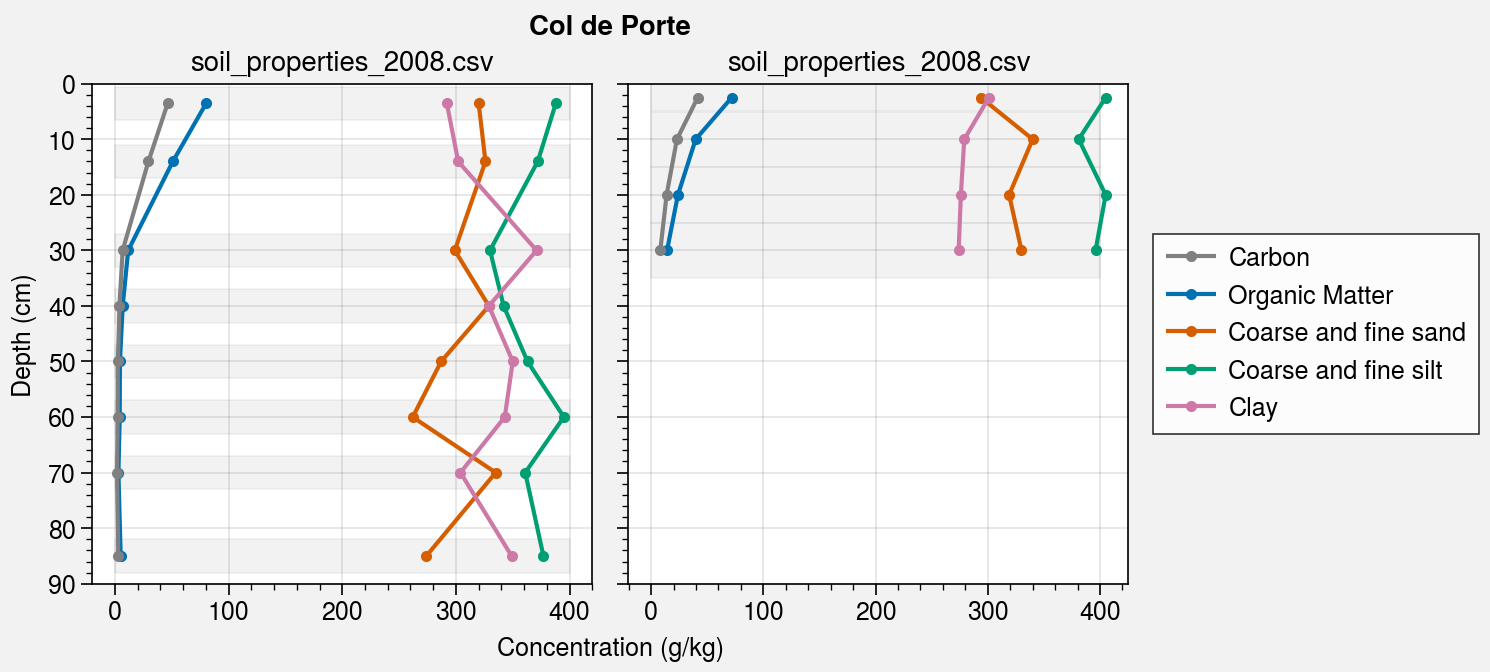

In [167]:
from matplotlib.patches import Rectangle

fig, axs = plot.subplots(nrows=1, ncols=2)

############
### 2008 ###
############

# Compute the average level of each measurements
center_depth_2008 = (df_2008.iloc[:, 0] + df_2008.iloc[:, 1])/2
marker = '.'

h1 = axs[0].plot(df_2008.iloc[:, 5], center_depth_2008, label='Organic Matter', marker=marker)
h2 = axs[0].plot(df_2008.iloc[:, 9] + df_2008.iloc[:, 10], center_depth_2008, label='Coarse and fine sand', marker=marker)
h3 = axs[0].plot(df_2008.iloc[:, 11] + df_2008.iloc[:, 12], center_depth_2008, label='Coarse and fine silt', marker=marker)
h4 = axs[0].plot(df_2008.iloc[:, 13], center_depth_2008, label='Clay', marker=marker)
h0 = axs[0].plot(df_2008.iloc[:, 3], center_depth_2008, label='Carbon', marker=marker, color='grey')

# Add the layer measurements
for i in range(df_2008.shape[0]):
    axs[0].add_patch(Rectangle((0, df_2008.iloc[i, 0]), 400, df_2008.iloc[i, 1]-df_2008.iloc[i, 0], alpha=0.1, color='grey'))

axs[0].format(title='soil_properties_2008.csv', xlabel='Concentration (g/kg)', ylabel='Depth (cm)', xreverse=False, yreverse=True, ylim=(90, 0))
# axs[0].legend([h0, h1, h2, h3, h4], loc='b', ncols=5)


############
### 2012 ###
############

# Compute the average level of each measurements
center_depth_2012 = (df_2012.iloc[:, 0] + df_2012.iloc[:, 1])/2
marker = '.'

h1 = axs[1].plot(df_2012.iloc[:, 5], center_depth_2012, label='Organic Matter', marker=marker)
h2 = axs[1].plot(df_2012.iloc[:, 9] + df_2012.iloc[:, 10], center_depth_2012, label='Coarse and fine sand', marker=marker)
h3 = axs[1].plot(df_2012.iloc[:, 11] + df_2012.iloc[:, 12], center_depth_2012, label='Coarse and fine silt', marker=marker)
h4 = axs[1].plot(df_2012.iloc[:, 13], center_depth_2012, label='Clay', marker=marker)
h0 = axs[1].plot(df_2012.iloc[:, 3], center_depth_2012, label='Carbon', marker=marker, color='grey')

# Add the layer measurements
for i in range(df_2012.shape[0]):
    axs[1].add_patch(Rectangle((0, df_2012.iloc[i, 0]), 400, df_2012.iloc[i, 1]-df_2012.iloc[i, 0], alpha=0.1, color='grey'))

axs[1].format(title='soil_properties_2008.csv', xlabel='Concentration (g/kg)', ylabel='Depth (cm)', xreverse=False, yreverse=True, ylim=(90, 0))
# axs[1].legend([h0, h1, h2, h3, h4], loc='r', ncols=1)

fig.suptitle('Col de Porte')
fig.legend([h0, h1, h2, h3, h4], loc='r', ncols=1)

